In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [117]:
column = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','output']
data = pd.read_csv('Datasets/adult.data',header=None)
data.columns = column

In [3]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df = data.copy()

## Data Preprocessing

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
[df.dtypes[df.dtypes == 'object']]

[workclass         object
 education         object
 marital-status    object
 occupation        object
 relationship      object
 race              object
 sex               object
 native-country    object
 output            object
 dtype: object]

In [7]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

as the type of workclass will effect the income of the person we use label encoding to encode the workclass feature

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])

as education standards also effect the income we will use label encoding to encode education

In [10]:
df['education'] = le.fit_transform(df['education'])

marital-status won't affect income in standards way we will use one-hot-encoding

In [11]:
df.drop('marital-status',axis=1,inplace=True)

as country of the person affect the income we use label-encoding

In [12]:
df['native-country'] = le.fit_transform(df['native-country'])

as sex and age wont affect the income of person we use one-hot-encoding

In [13]:
df['race'] = pd.get_dummies(df['race'],drop_first = True)
df['sex'] = pd.get_dummies(df['sex'],drop_first = True)

as realtionship won't effect the income we can drop 

In [14]:
df.drop('relationship',axis=1,inplace=True)

In [15]:
df['output'] = pd.get_dummies(df['output'],drop_first=True)

as occupation won't effect the income we can drop 

In [16]:
df.drop('occupation',axis=1,inplace=True)

In [17]:
df

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,39,7,77516,9,13,0,1,2174,0,40,39,0
1,50,6,83311,9,13,0,1,0,0,13,39,0
2,38,4,215646,11,9,0,1,0,0,40,39,0
3,53,4,234721,1,7,0,1,0,0,40,39,0
4,28,4,338409,9,13,0,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,0,0,0,0,38,39,0
32557,40,4,154374,11,9,0,1,0,0,40,39,1
32558,58,4,151910,11,9,0,0,0,0,40,39,0
32559,22,4,201490,11,9,0,1,0,0,20,39,0


* about fnlwgt - final weight

    The term estimate refers to population totals derived from CPS by creating "weighted
    tallies" of any specified socio-economic characteristics of the population. People with
    similar demographic characteristics should have similar weights.

In [18]:
df.describe()

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.868892,1.897784e+05,10.298210,10.080679,0.031909,0.669205,1077.648844,87.303830,40.437456,36.718866,0.240810
std,13.640433,1.455960,1.055500e+05,3.870264,2.572720,0.175761,0.470506,7385.292085,402.960219,12.347429,7.823782,0.427581
min,17.000000,0.000000,1.228500e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,4.000000,1.178270e+05,9.000000,9.000000,0.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,4.000000,1.783560e+05,11.000000,10.000000,0.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,4.000000,2.370510e+05,12.000000,12.000000,0.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,8.000000,1.484705e+06,15.000000,16.000000,1.000000,1.000000,99999.000000,4356.000000,99.000000,41.000000,1.000000


## Distribution plot

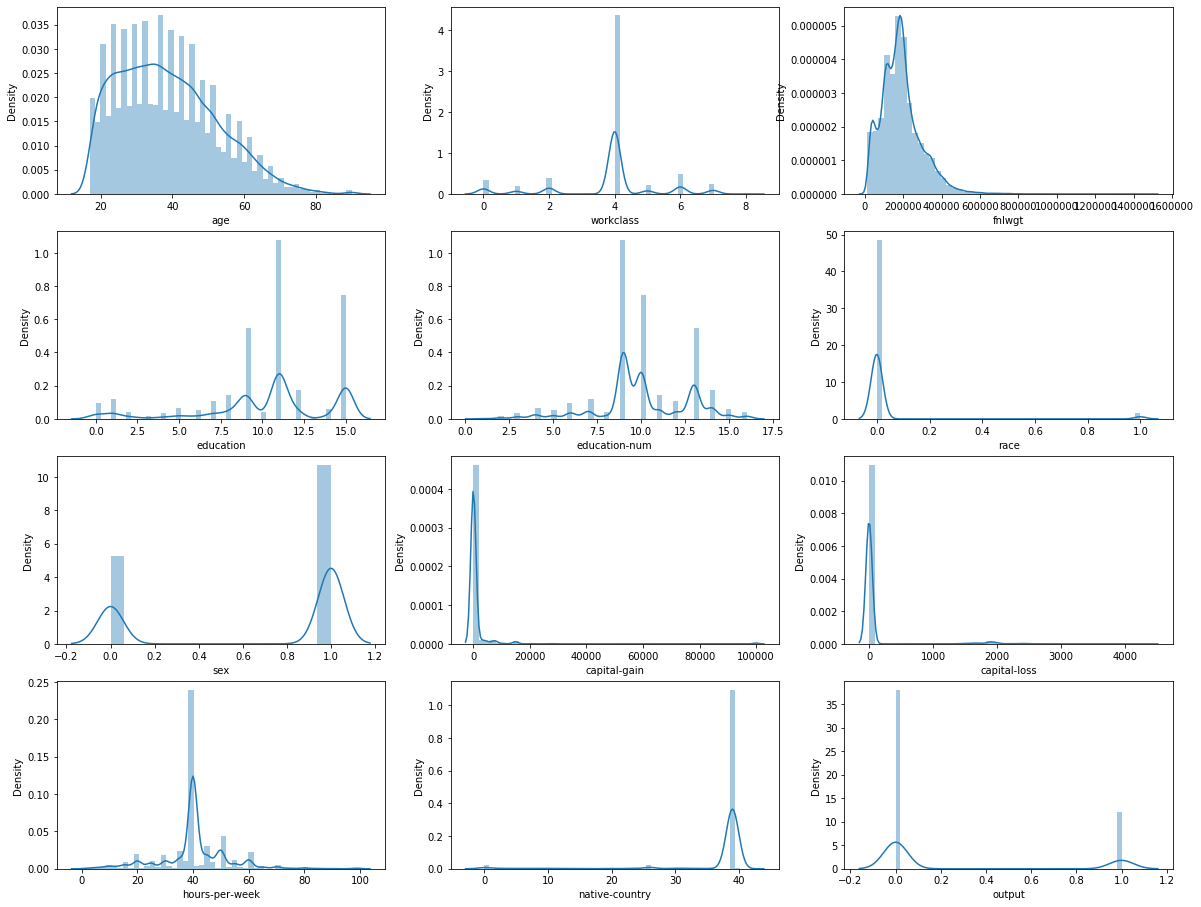

In [19]:
count=1
plt.figure(figsize=[20,20])
for column in df.columns:
    if count<=df.columns.size:
        plt.subplot(5,3,count)
        sns.distplot(df[column])
        count = count+1

## detecting outlier

### Using boxplot

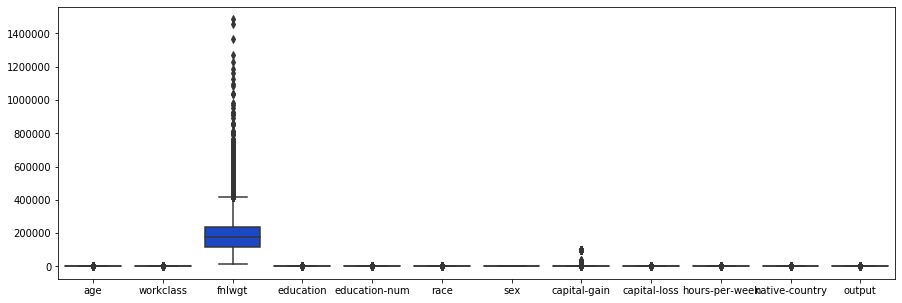

In [20]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df,palette='winter')

## Using z - score

Formula for Z score = (Observation — Mean)/Standard Deviation

z = (X — μ) / σ

converting the distribution into standard normal distribution

In [21]:
df['race'] = df['race'].astype('int')
df['sex'] = df['sex'].astype('int')
df['output'] = df['output'].astype('int')

In [22]:
df2 = df.drop(['output'],axis=1)

In [23]:
outliers=[]
    
threshold=3
mean = np.mean(df2)
std =np.std(df2)

for j in df2.columns:
    for i in df2[j]:
        z_score= (i - mean)/std
        if (np.abs(z_score) > threshold).all():
            outliers.append(i)

In [24]:
outliers # many outliers in final weight feature

[544091,
 507875,
 633742,
 523910,
 635913,
 538583,
 860348,
 1033222,
 543162,
 556660,
 680390,
 543028,
 526968,
 767403,
 520586,
 795830,
 509350,
 563883,
 910398,
 538319,
 508336,
 672412,
 549430,
 519627,
 675421,
 758700,
 509364,
 509364,
 656036,
 566117,
 548510,
 545483,
 573583,
 511361,
 716416,
 637222,
 664821,
 598606,
 572751,
 580248,
 519006,
 617021,
 596776,
 588905,
 517995,
 640383,
 611029,
 549341,
 746786,
 550848,
 510072,
 511331,
 656036,
 688355,
 587310,
 628797,
 632613,
 516337,
 571853,
 1184622,
 913447,
 632593,
 595000,
 703067,
 749105,
 543922,
 549349,
 562558,
 642830,
 523095,
 704108,
 557082,
 506858,
 537222,
 595000,
 577521,
 604506,
 564135,
 512103,
 716066,
 525878,
 538443,
 528616,
 515025,
 659273,
 541737,
 972354,
 608184,
 586657,
 1226583,
 664670,
 561334,
 791084,
 917220,
 508548,
 511289,
 512992,
 637080,
 671292,
 517000,
 548361,
 648223,
 522881,
 745768,
 523067,
 508891,
 647882,
 569761,
 585203,
 539563,
 103855

this method is not useful for big datasets as we need huge computation

but we can't remove the outliers because there will be more loss of datasets so we need to handle the outliers by clustering them so we need to use cluster algorithm for building a good model

so we will use k means cluster algorithm

we can standardise data also

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X1 = df.drop('output',axis=1)
X = sc.fit_transform(X1)
X1 = pd.DataFrame(X,columns = X1.columns)
X1['output'] = df['output']
df = X1

In [107]:
df

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output
0,0.030671,2.150579,-1.063611,-0.335437,1.134739,-0.181552,0.703071,0.148453,-0.21666,-0.035429,0.291569,0
1,0.837109,1.463736,-1.008707,-0.335437,1.134739,-0.181552,0.703071,-0.145920,-0.21666,-2.222153,0.291569,0
2,-0.042642,0.090050,0.245079,0.181332,-0.420060,-0.181552,0.703071,-0.145920,-0.21666,-0.035429,0.291569,0
3,1.057047,0.090050,0.425801,-2.402511,-1.197459,-0.181552,0.703071,-0.145920,-0.21666,-0.035429,0.291569,0
4,-0.775768,0.090050,1.408176,-0.335437,1.134739,-0.181552,-1.422331,-0.145920,-0.21666,-0.035429,-4.054223,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.090050,0.639741,-0.852205,0.746039,-0.181552,-1.422331,-0.145920,-0.21666,-0.197409,0.291569,0
32557,0.103983,0.090050,-0.335433,0.181332,-0.420060,-0.181552,0.703071,-0.145920,-0.21666,-0.035429,0.291569,1
32558,1.423610,0.090050,-0.358777,0.181332,-0.420060,-0.181552,-1.422331,-0.145920,-0.21666,-0.035429,0.291569,0
32559,-1.215643,0.090050,0.110960,0.181332,-0.420060,-0.181552,0.703071,-0.145920,-0.21666,-1.655225,0.291569,0


In [108]:
df['fnlwgt'].unique().size

21648

so there are some common weights --- 10913 

## Checking correlation in dataset

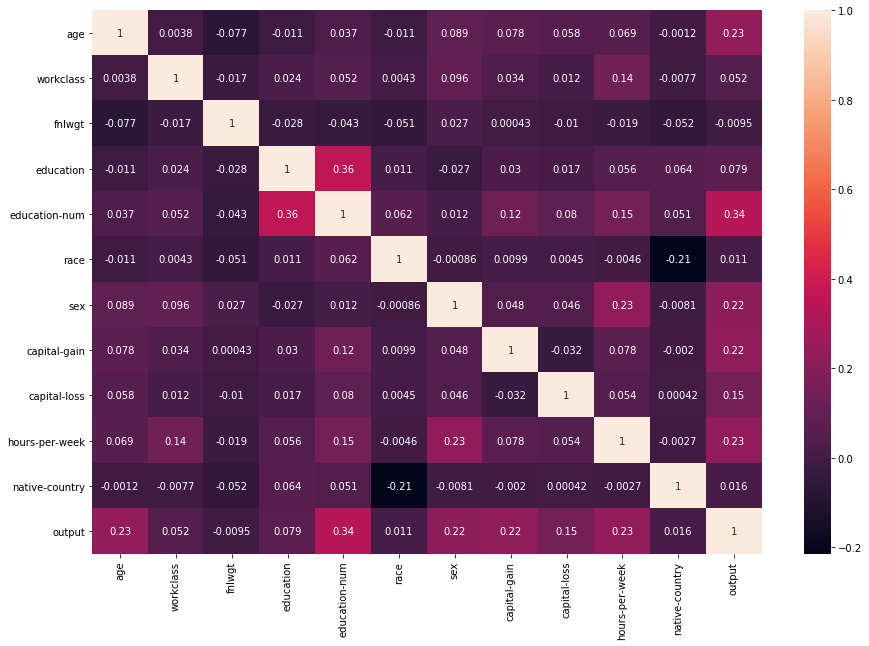

In [112]:
corr = df.corr()
plt.figure(figsize = [15,10])
sns.heatmap(corr,annot = True)

There are not much multicollinearity in the dataset

In [57]:
# checking the null values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
output            0
dtype: int64

# clustering - Kmeans

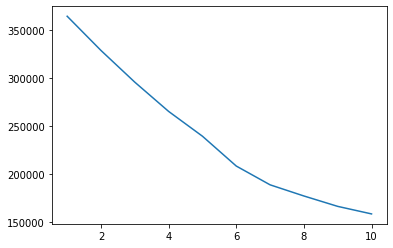

In [58]:
wcss = []
from sklearn.cluster import KMeans
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)

so we can make upto 5 clusters

In [86]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)

In [87]:
## dividing data into clusters
y_kmeans = kmeans.fit_predict(df)

In [88]:
y_kmeans

array([1, 1, 1, ..., 3, 1, 3])

In [89]:
df['clusters'] = y_kmeans

In [90]:
df

,age,workclass,fnlwgt,education,education-num,race,sex,capital-gain,capital-loss,hours-per-week,native-country,output,clusters
0,0.030671,2.150579,-1.063611,-0.335437,1.134739,-0.181552,0.703071,0.148453,-0.21666,-0.035429,0.291569,0,1
1,0.837109,1.463736,-1.008707,-0.335437,1.134739,-0.181552,0.703071,-0.145920,-0.21666,-2.222153,0.291569,0,1
2,-0.042642,0.090050,0.245079,0.181332,-0.420060,-0.181552,0.703071,-0.145920,-0.21666,-0.035429,0.291569,0,1
3,1.057047,0.090050,0.425801,-2.402511,-1.197459,-0.181552,0.703071,-0.145920,-0.21666,-0.035429,0.291569,0,2
4,-0.775768,0.090050,1.408176,-0.335437,1.134739,-0.181552,-1.422331,-0.145920,-0.21666,-0.035429,-4.054223,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.090050,0.639741,-0.852205,0.746039,-0.181552,-1.422331,-0.145920,-0.21666,-0.197409,0.291569,0,3
32557,0.103983,0.090050,-0.335433,0.181332,-0.420060,-0.181552,0.703071,-0.145920,-0.21666,-0.035429,0.291569,1,1
32558,1.423610,0.090050,-0.358777,0.181332,-0.420060,-0.181552,-1.422331,-0.145920,-0.21666,-0.035429,0.291569,0,3
32559,-1.215643,0.090050,0.110960,0.181332,-0.420060,-0.181552,0.703071,-0.145920,-0.21666,-1.655225,0.291569,0,1


In [98]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
rand_clf = RandomForestClassifier()
xgb = XGBClassifier()

In [100]:
tree = DecisionTreeClassifier()

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

## Finding the best model for each cluster

In [94]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

[23:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


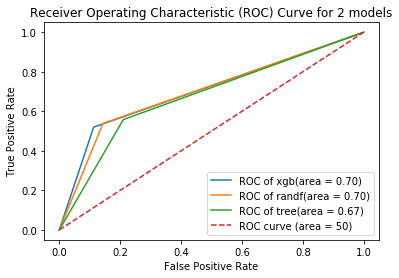

xgb is best model for cluster  1
xgb score is  0.7035012121481039


[23:45:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


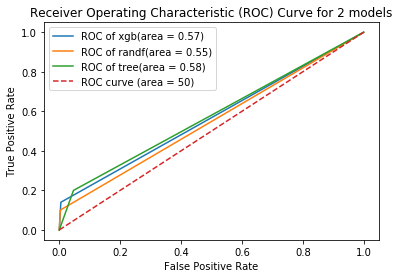

xgb is best model for cluster  2
xgb score is  0.5674093264248705


[23:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


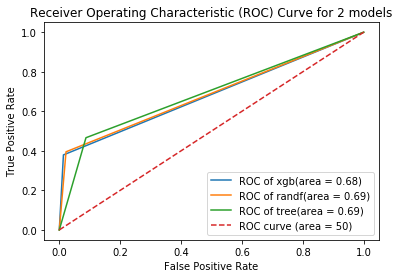

Decision tree is best model for cluster  3
Decision tree score is  0.6893949345019882


[23:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


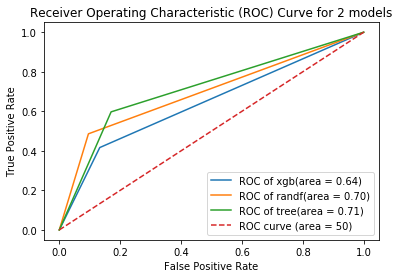

Decision tree is best model for cluster  4
Decision tree score is  0.7135047281323877


[23:45:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


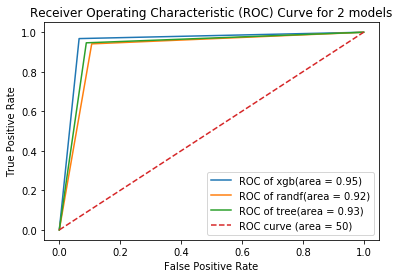

xgb is best model for cluster  0
xgb score is  0.9514128405531119




In [101]:
for i in df['clusters'].unique():
    
    #filter the data for one cluster
    cluster_data = df[df['clusters']==i]

    # prepare the feature and label columns
    cluster_features = cluster_data.drop(['output','clusters'],axis=1)
    cluster_label = cluster_data['output']

    # splitting the data into train and test for each cluster one by one

    x_train,x_test,y_train,y_test = train_test_split(cluster_features,cluster_label,test_size=0.25,random_state=355)

    xgb.fit(x_train,y_train)
    y_pred_xgb = xgb.predict(x_test)
    rand_clf.fit(x_train,y_train)
    y_pred_rand = rand_clf.predict(x_test)
    tree.fit(x_train,y_train)
    y_pred_tree = tree.predict(x_test)
    
    
    
    # getting the best model for each clusters
    xgboost_score = roc_auc_score(y_test,y_pred_xgb)
    randomf_score = roc_auc_score(y_test,y_pred_rand)
    tree_score = roc_auc_score(y_test,y_pred_tree)

    
    # comparing three models
    auc_xgb = roc_auc_score(y_test,y_pred_xgb)
    auc_rand = roc_auc_score(y_test,y_pred_rand)
    auc_tree = roc_auc_score(y_test,y_pred_tree)
    fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test,y_pred_xgb)
    fpr_rand, tpr_rand, thresholds_rand = roc_curve(y_test,y_pred_rand)
    fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_test,y_pred_tree)
    
    # plotting roc - auc curve for each cluster
    plt.plot(fpr_xgb, tpr_xgb, label='ROC of xgb(area = %0.2f)'%auc_xgb)
    plt.plot(fpr_rand,tpr_rand,label='ROC of randf(area = %0.2f)'%auc_rand)
    plt.plot(fpr_tree,tpr_tree,label='ROC of tree(area = %0.2f)'%auc_tree)
    plt.plot([0, 1], [0, 1], linestyle='--',label='ROC curve (area = 50)')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for 2 models')
    plt.legend()
    plt.show()
    
    
    if(randomf_score <  xgboost_score):
        print('xgb is best model for cluster ',i)
        print('xgb score is ',xgboost_score)
        print('\n')
    elif(randomf_score<tree_score):
        print('Decision tree is best model for cluster ',i)
        print('Decision tree score is ',tree_score)
        print('\n')
    else:
        print('random forest is best model for cluster ',i)
        print('random forest score is ',randomf_score)
        print('\n')

#### in each cluster we can do hyper parameter tuning also to get best model from each cluster

### Training without Clustering

In [103]:
X1 = df.drop('output',axis=1)
X1 = X1.drop('clusters',axis=1)
y1 = df['output']
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.25,random_state=355)

# xgboost
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
print('\n')
print('roc auc score for xgboost: ',roc_auc_score(y_test,y_pred_xgb))

# random forest
rand_clf.fit(X_train,y_train)
y_pred_randf = rand_clf.predict(X_test)
print('roc auc score for random forest: ',roc_auc_score(y_test,y_pred_randf))

# tree 
tree.fit(X_train,y_train)
y_pred_tree = tree.predict(X_test)
print('roc auc score for tree: ',roc_auc_score(y_test,y_pred_tree))

[23:47:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


roc auc score for xgboost:  0.7510283048993195
roc auc score for random forest:  0.7332860105574173
roc auc score for tree:  0.710303914821309


so clustering is good option